In [192]:
# ncbi_server_url = 'http://localhost:3030/mydataset/query'
# get_taxon_vector("Sogatella furcifera",ncbi_server_url)

# Enhancement

In [228]:
from modul.vectorReferenced import get_taxon_vector,cek_ncbi_id_by_wiki_id_via_string
from modul.filterNodeEdge import removeNodeAndEdgeByFilter,removeEdgesNotInNodes
from modul.helper_umum import contains_string_entire_column,contains_string_entire_column_boolean
from modul.preprocess import cleaning, splitInteractionToNodeEdge
from modul.disambiguation_optimized import buat_kamus_kosong, update_kamus_pake_wikidata, update_df_pake_kamus, update_df_pake_path_ujung, removeOtherThanNCBI
from modul.standardization_usingsparql import addTaxonColumn, buat_kolom_taxon_awal
import requests
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import importlib, sys
importlib.reload(sys.modules['modul.enhancementHelper'])
from modul.enhancementHelper import getDFMusuhAlami, getFactDict, getWdId,getPicture, getAbstract, getSeranggaKerabatNCBI
from modul.disambiguation_optimized import __querying

## Musuh alami
GLOBI, NCBI

In [221]:
df_node,df_edge=getDFMusuhAlami("Bemisia Tabaci") #"bemisia tabaci" # "NCBI:7038"

removeNodeAndEdgeByFilter
sebelum : 76 74
sesudah : 70 69
['EOL', 'GBIF', 'INAT_TAXON', 'EOL_V2'] 4  database,  4  kali perulangan akses NCBI
EOL : jumlah id 124


100%|██████████| 107/107 [00:00<00:00, 365167.23it/s]


GBIF : jumlah id 42


100%|██████████| 42/42 [00:00<00:00, 355880.34it/s]


INAT_TAXON : jumlah id 14


100%|██████████| 11/11 [00:00<00:00, 244112.93it/s]


EOL_V2 : jumlah id 21


100%|██████████| 10/10 [00:00<00:00, 251155.93it/s]


removeOtherThanNCBI
sebelum : 70 69
sesudah : 70 69
removeEdgesNotInNodes
sebelum :  69
sesudah :  69


/Users/mohzulkiflikatili/2latihan_python/_Kuliah/thesis/wikidata_etc/fix_thesis/modul/enhancementHelper.py:81: UserWarning:

This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.

/Users/mohzulkiflikatili/2latihan_python/_Kuliah/thesis/wikidata_etc/fix_thesis/modul/enhancementHelper.py:82: UserWarning:

This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.



In [220]:
if (df_node is None):
    print("Tidak ada hasil")

Tidak ada hasil


In [ ]:
# sudah di method diatas

# #2 ambil data dari globi
# kolom=[
#     'source_taxon_external_id',
#     'source_taxon_name',
#     'source_taxon_path',
#     'source_taxon_path_ids',
#     'source_taxon_path_ranks',
    
#     'interaction_type',
    
#     'target_taxon_external_id',
#     'target_taxon_name',
#     'target_taxon_path',
#     'target_taxon_path_ids',
#     'target_taxon_path_ranks',
# ]

# interactionType="hostOf"
# search="Bemisia tabaci"
# link="https://api.globalbioticinteractions.org/interaction?sourceTaxon="+search+"&interactionType="+interactionType+"&fields="+(','.join(kolom))
# response = requests.get(link)
# res=response.json()
# if not res['data']:
#     print('stop kosong')
# # JSON To Pandas Dataframe
# df_serangga_hasil = pd.json_normalize(res, record_path =['data'])
# df_serangga_hasil.columns=kolom

# # split interaksi
# df_node, df_edge = splitInteractionToNodeEdge(df_serangga_hasil)

# #4 cleaning_after_get layer 1 interaksi virus
# df_node.drop_duplicates(inplace=True)
# df_node.reset_index(drop=True,inplace=True)
# no_ncbi_and_path_null=(df_node.taxon_id.str.contains('NCBI')==False) & (df_node.taxon_path_ids.isnull())
# df_node,df_edge = removeNodeAndEdgeByFilter(df_node[no_ncbi_and_path_null], df_node,df_edge) 
# df_edge.drop_duplicates(inplace=True)
# df_edge.reset_index(drop=True,inplace=True)

# #5 disambiguasi layer 1 interaksi virus
# kamus_ncbi = buat_kamus_kosong(df_node)
# kamus_ncbi = update_kamus_pake_wikidata(kamus_ncbi)
# #update dataframe pake kamus
# df_node,df_edge = update_df_pake_kamus(kamus_ncbi,df_node,df_edge)
# df_node,df_edge = update_df_pake_path_ujung(df_node,df_edge)
# #standarisasi layer 1 interaksi virus
# df_node = buat_kolom_taxon_awal(df_node) #buat kolom taxon, default none
# df_node = addTaxonColumn(df_node,'http://localhost:3030/mydataset/query') # isi pake ncbi

# # cleaning after disambiguasi
# df_node, df_edge = removeOtherThanNCBI(df_node,df_edge)# Hapus kalo masih ada selain NCBI
# df_edge = removeEdgesNotInNodes(df_node, df_edge) #hapus edge yang tidak ada nodenya

# #12 praproses tambahan
# # pengelompokan
# # Binning of the data based on serangga, virus, tanaman, nogroup
# filter_tanaman = df_node['kingdom']=='NCBI:33090_Viridiplantae' 
# filter_virus = (
#     (df_node['superkingdom']=='NCBI:10239_Viruses')
#     | (df_node.taxon_name.str.contains(r'\b(virus\w*|\w*virus)\b',case=False))
#     | (df_node.taxon_path.str.contains(r'\b(virus\w*|\w*virus)\b', case=False)) 
#     #jika berawalan atau berakhiran kata virus
# )
# filter_serangga = ((df_node['class']=='NCBI:50557_Insecta') )#& (df_node['order']!='NCBI:7399_Hymenoptera')) #dan bukan lebah hymenoptera

# df_node.loc[filter_tanaman, ['group','color']] = ["tanaman",'#1f922b'] #hijau
# df_node.loc[filter_virus, ['group','color']] = ['virus','#671f92'] #ungu
# df_node.loc[filter_serangga, ['group','color']] = ['serangga','#b22222'] #merah
# df_node.loc[(
#     (filter_tanaman==False) & 
#     (filter_virus==False) &
#     (filter_serangga==False) 
#     ),['group','color']] = ['nogroup','#EADDCA'] #abu-abu

In [ ]:
#3
#konversi graph 
gnx = nx.MultiDiGraph()
#node
for i,a in df_node.iterrows():
    #mulai disini akan digunakan taksonomi bahasa indonesia pada data.
    gnx.add_node(
        a['taxon_id'],
        label=a['taxon_name'],
        superkingdom=a['superkingdom'],
        kingdom=a['kingdom'],
        filum=a['phylum'],
        kelas=a['class'],
        ordo=a['order'],
        famili=a['family'],
        genus=a['genus'],
        spesies=a['species'],
        group=a['group'],
        color=a['color'],
    )
#edge
for i,a in df_edge.iterrows():
    gnx.add_edge(
        a['source_taxon_id'],
        a['target_taxon_id'],
        label=a['interaction_type'],
    )

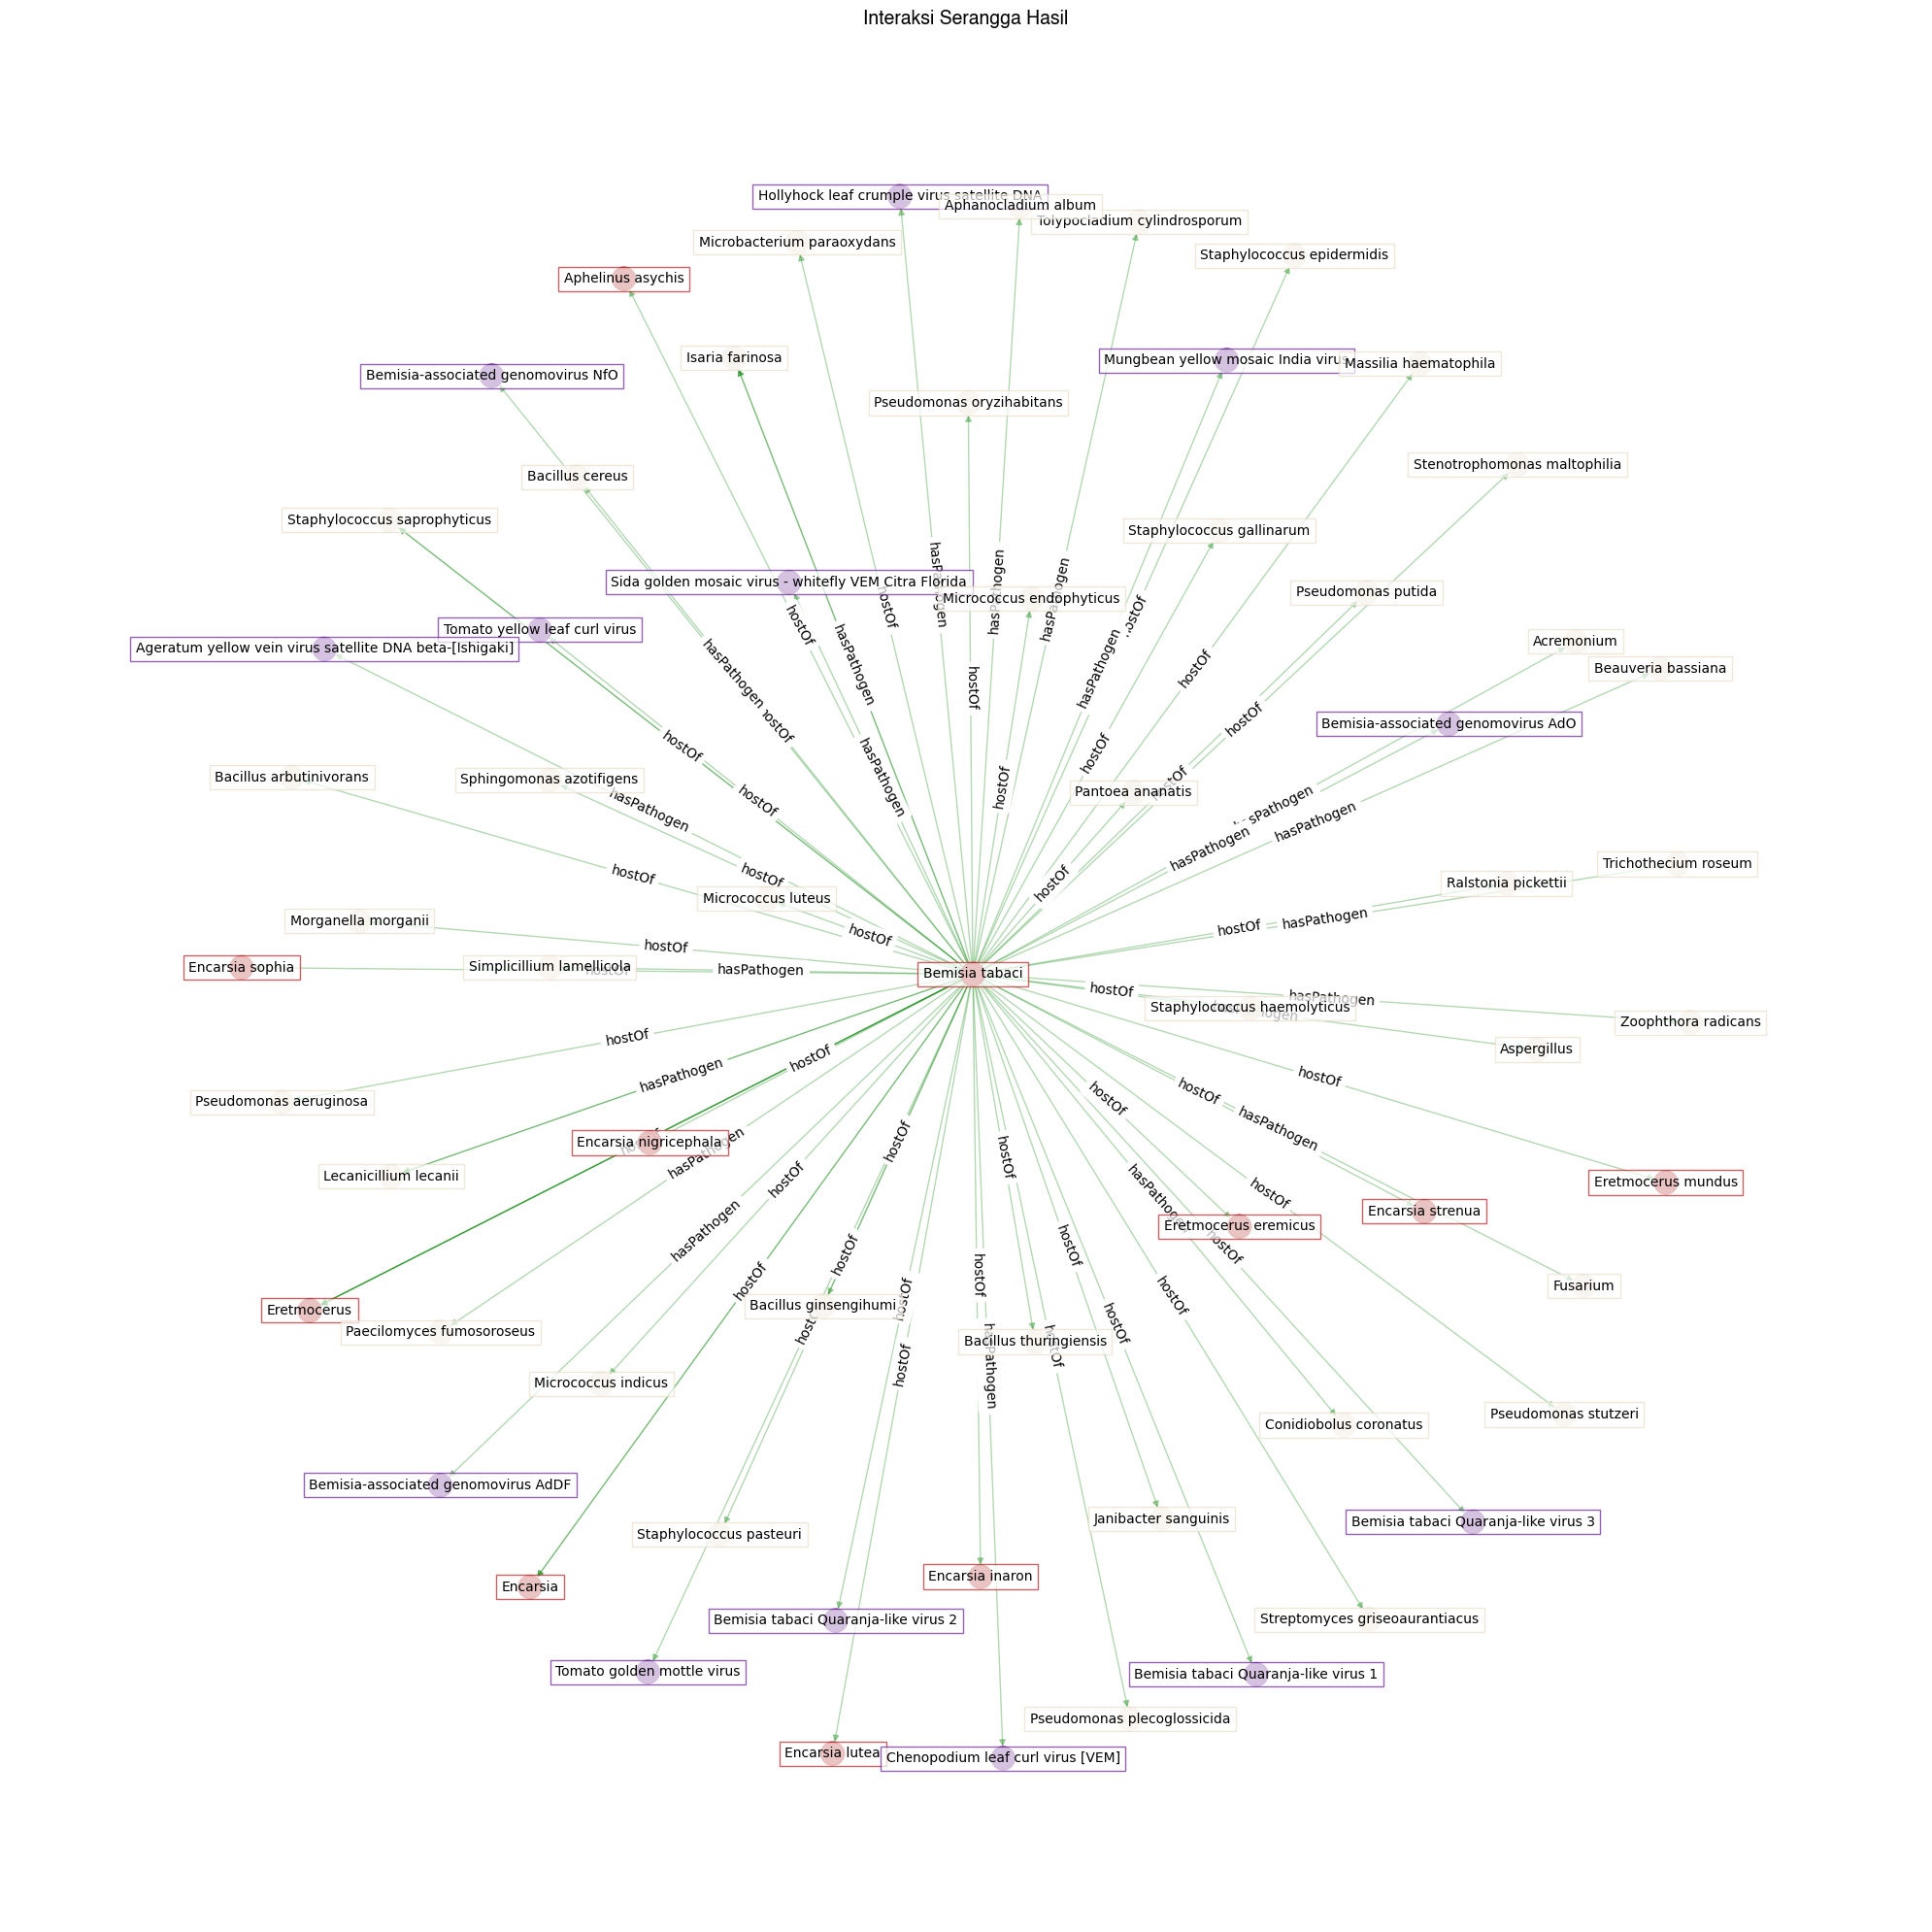

In [ ]:
# cuma tampilan, visualisasi graf
G=gnx

fig, ax = plt.subplots(figsize=(20, 20))

# Generate layout for visualization
# pos = nx.kamada_kawai_layout(G)
# pos = nx.spring_layout(G)
pos = nx.nx_agraph.graphviz_layout(G, prog="neato", args="")

# Visualize graph components
nx.draw_networkx_edges(G, pos, alpha=0.3, edge_color='g')
nx.draw_networkx_nodes(G, pos, node_color=list(nx.get_node_attributes(G, "color").values()), alpha=0.9)

#node label
for i in ['#b22222','#671f92','#1f922b','#EADDCA']: # filtering dengan bedakan warna node
    label_options = {"ec": i, "fc": 'white', "alpha": 0.7}
    labels={nd[0]:nd[1]['label'] for nd in gnx.nodes(data=True) if nd[1]['color']==i}

    nx.draw_networkx_labels(
        nx.subgraph_view(G, filter_node=lambda n1: G.nodes(data=True)[n1].get("color", True) == i),
        pos, 
        labels=labels,
        font_size=10, 
        bbox=label_options
    )

#edge labels
edge_labels={x:i for i,x in zip(nx.get_edge_attributes(G, "label").values(),G.edges())}
nx.draw_networkx_edge_labels(G, pos=pos, edge_labels=edge_labels)


# Title/legend
font = {"fontname": "Helvetica", "color": "k", "fontweight": "bold", "fontsize": 14}
ax.set_title("Interaksi Serangga Hasil", font)
# Change font color for legend
font["color"] = "r"

# ax.text(
#     0.80,
#     0.10,
#     "hijau = Tanaman",
#     horizontalalignment="center",
#     transform=ax.transAxes,
#     fontdict=font,
# )
# ax.text(
#     0.80,
#     0.08,
#     "merah = Serangga",
#     horizontalalignment="center",
#     transform=ax.transAxes,
#     fontdict=font,
# )

# ax.text(
#     0.80,
#     0.06,
#     "ungu = Virus",
#     horizontalalignment="center",
#     transform=ax.transAxes,
#     fontdict=font,
# )

# ax.text(
#     0.80,
#     0.04,
#     "abu-abu = Nogroup",
#     horizontalalignment="center",
#     transform=ax.transAxes,
#     fontdict=font,
# )

# Resize figure for label readibility
ax.margins(0.1, 0.05)
fig.tight_layout()
plt.axis("off")
plt.show()

In [ ]:
df_node[df_node.taxon_name.str.contains(r'\b(eretmocerus\w*|\w*eretmocerus)\b',case=False)][[
    'taxon_name','taxon_id','superkingdom','kingdom','phylum','class','order','family','genus','species'
    ]]

/var/folders/b9/v73gyxys1djbgjy3c8c3cfwm0000gn/T/ipykernel_59030/1455527824.py:1: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df_node[df_node.taxon_name.str.contains(r'\b(eretmocerus\w*|\w*eretmocerus)\b',case=False)][[


,taxon_name,taxon_id,superkingdom,kingdom,phylum,class,order,family,genus,species
0,Eretmocerus staufferi,NCBI:77301,NCBI:2759_Eukaryota,NCBI:33208_Metazoa,NCBI:6656_Arthropoda,NCBI:50557_Insecta,NCBI:7399_Hymenoptera,NCBI:108385_Aphelinidae,NCBI:77301_Eretmocerus,EOL:844043_Eretmocerusstaufferi
2,Eretmocerus melanoscutus,NCBI:77301,NCBI:2759_Eukaryota,NCBI:33208_Metazoa,NCBI:6656_Arthropoda,NCBI:50557_Insecta,NCBI:7399_Hymenoptera,NCBI:108385_Aphelinidae,NCBI:77301_Eretmocerus,EOL:844096_Eretmocerusmelanoscutus
3,Eretmocerus tejanus,NCBI:77301,NCBI:2759_Eukaryota,NCBI:33208_Metazoa,NCBI:6656_Arthropoda,NCBI:50557_Insecta,NCBI:7399_Hymenoptera,NCBI:108385_Aphelinidae,NCBI:77301_Eretmocerus,EOL:844042_Eretmocerustejanus
6,Eretmocerus eremicus,NCBI:272444,NCBI:2759_Eukaryota,NCBI:33208_Metazoa,NCBI:6656_Arthropoda,NCBI:50557_Insecta,NCBI:7399_Hymenoptera,NCBI:108385_Aphelinidae,NCBI:77301_Eretmocerus,NCBI:272444_Eretmocerus eremicus
9,Eretmocerus,NCBI:77301,NCBI:2759_Eukaryota,NCBI:33208_Metazoa,NCBI:6656_Arthropoda,NCBI:50557_Insecta,NCBI:7399_Hymenoptera,NCBI:108385_Aphelinidae,NCBI:77301_Eretmocerus,None
16,Eretmocerus mundus,NCBI:77302,NCBI:2759_Eukaryota,NCBI:33208_Metazoa,NCBI:6656_Arthropoda,NCBI:50557_Insecta,NCBI:7399_Hymenoptera,NCBI:108385_Aphelinidae,NCBI:77301_Eretmocerus,NCBI:77302_Eretmocerus mundus


In [ ]:
gnx.nodes(data=True)['NCBI:77301']

{'label': 'Eretmocerus',
 'superkingdom': 'NCBI:2759_Eukaryota',
 'kingdom': 'NCBI:33208_Metazoa',
 'filum': 'NCBI:6656_Arthropoda',
 'kelas': 'NCBI:50557_Insecta',
 'ordo': 'NCBI:7399_Hymenoptera',
 'famili': 'NCBI:108385_Aphelinidae',
 'genus': 'NCBI:77301_Eretmocerus',
 'spesies': None,
 'group': 'serangga',
 'color': '#b22222'}

In [ ]:
# cuma tampilan
import plotly.graph_objects as go
data = df_node[df_node['taxon_id']!='NCBI:7038'] #yang bukan serangga utama
data = data.groupby(['group','color']).agg({'group': ['count'], }).reset_index().sort_values(
    ('group', 'count'),ascending=False
).reset_index(drop=True).values
labels = [i[0] for i in data]
colors = [i[1] for i in data]
slices = [i[2] for i in data]

fig = go.Figure(data=[go.Pie(labels=labels,values=slices)])
fig.update_traces(hoverinfo='label+percent', textinfo='value+percent', textfont_size=20, marker=dict(colors=colors, line=dict(color='#000000', width=0.1)))
fig.show()

In [ ]:
df_node[df_node['group']=='serangga'][['taxon_id','taxon_name','species']]

,taxon_id,taxon_name,species
0,NCBI:77301,Eretmocerus staufferi,EOL:844043_Eretmocerusstaufferi
1,NCBI:261664,Encarsia strenua,NCBI:261664_Encarsia strenua
2,NCBI:77301,Eretmocerus melanoscutus,EOL:844096_Eretmocerusmelanoscutus
3,NCBI:77301,Eretmocerus tejanus,EOL:844042_Eretmocerustejanus
4,NCBI:121802,Encarsia lutea,NCBI:121802_Encarsia lutea
5,NCBI:163151,Aphelinus asychis,EOL:1067535_Aphelinusasychis
6,NCBI:272444,Eretmocerus eremicus,NCBI:272444_Eretmocerus eremicus
7,NCBI:121805,Encarsia nigricephala,NCBI:121805_Encarsia nigricephala
8,NCBI:32399,Encarsia quaintancei,EOL:844576_Encarsiaquaintancei
9,NCBI:77301,Eretmocerus,None


# Enhancement : Wikidata

In [208]:
# wd_id='Q1303946'
wd_id=getWdId("Bemisia Tabaci")
if wd_id is None:
    print('kosong')
else:
    # getfactbox
    df_fact=getFactDict(wd_id)
    df_fact

ditemukan entitas sebanyak : 7
entitas pertama : {'id': 'Q1303946', 'title': 'Q1303946', 'pageid': 1243925, 'display': {'label': {'value': 'Silverleaf whitefly', 'language': 'en'}, 'description': {'value': 'species of insect', 'language': 'en'}}, 'repository': 'wikidata', 'url': '//www.wikidata.org/wiki/Q1303946', 'concepturi': 'http://www.wikidata.org/entity/Q1303946', 'label': 'Silverleaf whitefly', 'description': 'species of insect', 'match': {'type': 'alias', 'language': 'en', 'text': 'Bemisia tabaci'}, 'aliases': ['Bemisia tabaci']}


### serangga kerabat

In [232]:
kerabat = getSeranggaKerabatNCBI('NCBI:7038')
if(kerabat is None):
    print('kosong')
kerabat

[('Bemisia', 'genus', 'NCBI:7037'),
 ("Bemisia nr. tabaci 'Renmark'", 'species', 'NCBI:111471'),
 ('Bemisia aff. tabaci LZ-2012', 'species', 'NCBI:1168090'),
 ('Bemisia sp. LZ-2012', 'species', 'NCBI:1168091'),
 ('Bemisia sp. Unknown_Th_13_12_S.lycopersicum', 'species', 'NCBI:1775787'),
 ('Bemisia sp. Unknown_Vn_13_43_Weed', 'species', 'NCBI:1775788'),
 ('Bemisia sp. WTT-2017', 'species', 'NCBI:1974374'),
 ('Bemisia sp. BIOUG04903-G02', 'species', 'NCBI:1996894'),
 ('Bemisia sp. NS-2019', 'species', 'NCBI:2591941'),
 ('Bemisia sp. PB-2004', 'species', 'NCBI:267824'),
 ('Bemisia sp. PDB_1', 'species', 'NCBI:2704995'),
 ('Bemisia sp. PDB_2-1', 'species', 'NCBI:2704996'),
 ('Bemisia sp. PDB_2-2', 'species', 'NCBI:2704997'),
 ('Bemisia sp.', 'species', 'NCBI:2764695'),
 ('Bemisia sp. SSA1', 'species', 'NCBI:2780486'),
 ('Bemisia sp. Uganda1', 'species', 'NCBI:2780487'),
 ('Bemisia sp. 20-9 WZ-2010', 'species', 'NCBI:860381'),
 ('Bemisia sp. 55 WZ-2010', 'species', 'NCBI:860382'),
 ('Bemisi

### artikel terkait

In [ ]:
# artikel
from modul.disambiguation_optimized import __querying

format_='json'
endpoint_url='https://query.wikidata.org/sparql'
query = """
SELECT ?date ?venue ?title ?url {
    ?s wdt:P921 wd:Q1303946 . # main subject about COVID-19
    { { ?s wdt:P31 wd:Q580922 } UNION { ?s wdt:P31 wd:Q13442814 } } # preprint or scholarly article
    ?s wdt:P1476 ?title .
    ?s wdt:P356 ?doi .
    BIND(IRI(CONCAT("https://doi.org/", STR(?doi))) AS ?url)
    ?s wdt:P577 ?date .
    ?s wdt:P1433 ?venueRes .
    ?venueRes wdt:P1476 ?venue .
}
"""
hasil=__querying(endpoint_url,query,format_)
kembalian=[
        (
            i['date']['value'].split('T')[0],
            i['title']['value'],
            i['venue']['value'],
            i['url']['value'].replace('https://doi.org/','doi:')
        ) 
        for i in hasil['results']['bindings']
    ]

In [ ]:

df = pd.DataFrame(kembalian, columns= ['date','title','venue','url'])

In [ ]:
for i in df.sort_values('date',ascending=False).reset_index(drop=True).head(12).title:
    print(i)

Bemisia tabaci MEAM1 still remains the dominant species in open field crops in Brazil
Isolation and molecular characterization of Cordyceps sp. from Bemisia tabaci (Hemiptera: Aleyrodidae) and pathogenic to Glycaspis brimblecombei (Hemiptera: Aphalaridae)
Genetic diversity, distribution, and structure of Bemisia tabaci whitefly species in potential invasion and hybridization regions of East Africa
Insecticide Resistance and Its Management in Two Invasive Cryptic Species of Bemisia tabaci in China
Life history parameters of Bemisia tabaci MED (Hemiptera: Aleyrodidae) in the present and future climate of central Europe, predicted by physically realistic climatic chamber simulation
Field-evolved resistance and mechanisms in Bemisia tabaci Asia I to a novel pyropene insecticide, afidopyropen, in India
Predicting Climate Change Effects on the Potential Distribution of Two Invasive Cryptic Species of the Bemisia tabaci Species Complex in China
Evaluation of the Efficacy of Flupyradifurone ag

### jurnal terkait

In [ ]:
df.groupby('venue').count().sort_values('title',ascending=False).reset_index().head(10)

,venue,date,title,url
0,Acta Entomologica Sinica,140,140,140
1,昆虫学报,140,140,140
2,Pest Management Science,93,93,93
3,Journal of Economic Entomology,82,82,82
4,PLOS ONE,57,57,57
5,Insects,47,47,47
6,Bulletin of Entomological Research,46,46,46
7,Neotropical entomology,36,36,36
8,Neotropical Entomology,36,36,36
9,Scientific Reports,33,33,33


### Foto serangga

In [ ]:
print(wd_id)
getPicture(wd_id)

None


In [195]:
# wd_id='Q1303946'
getAbstract(wd_id)

'The silverleaf whitefly (Bemisia tabaci, also informally referred to as the sweet potato whitefly) is one of several species of whitefly that are currently important agricultural pests. A review in 2011 concluded that the silverleaf whitefly is actually a species complex containing at least 40 morphologically indistinguishable species. The silverleaf whitefly thrives worldwide in tropical, subtropical, and less predominately in temperate habitats. Cold temperatures kill both the adults and the nymphs of the species. The silverleaf whitefly can be confused with other insects such as the common fruitfly, but with close inspection, the whitefly is slightly smaller and has a distinct wing color that helps to differentiate it from other insects. While the silverleaf whitefly had been known in the United States since 1896, in the mid-1980s an aggressive strain appeared in poinsettia crops in Florida. For convenience that strain was referred to as strain B (biotype B), to distinguish it from